# CarND Behavioral Cloning Project 3
Here I'll step the code I wrote to tackle this project.

## Loading the data
I'm starting with just a few images to keep myself from getting overwhelmed.  This project is a challenge!

In [1]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from PIL import Image
import csv

%matplotlib inline

In [2]:
#Getting data from the first run.
with open('data/run1/driving_log.csv') as csvfile:
    logreader = csv.DictReader(csvfile,fieldnames=['center','left','right','steering','throttle','brake','speed'])
    file_paths = []
    steering_angles = []
    for row in logreader:
        file_paths.append(row['center'])
        steering_angles.append(row['steering'])

print(len(file_paths))

print(len(steering_angles))

2777
2777


In [3]:
'''
367 - negative angle
/home/alex/SelfDriving/CarND-Behavioral-Cloning-P3/IMG/center_2017_02_05_19_03_25_616.jpg,,,-0.1320755,0.4,0,30.03791

820 - positive angle
/home/alex/SelfDriving/CarND-Behavioral-Cloning-P3/IMG/center_2017_02_05_19_03_59_950.jpg,,,0.1698113,0.4,0,30.03462

2410- no turn
/home/alex/SelfDriving/CarND-Behavioral-Cloning-P3/IMG/center_2017_02_05_19_06_31_005.jpg,,,0,0.4,0,30.03838
'''

'''
Now I'm actually loading one whole run
'''
from os import path
import numpy as np
X_train = []
y_train = []
for image_index in range(len(file_paths)):
    image_array = ndimage.imread("".join(['./data/run1/IMG/',path.basename(file_paths[image_index])]))
    X_train.append(image_array)
    angle = steering_angles[image_index]
    y_train.append(angle)
    

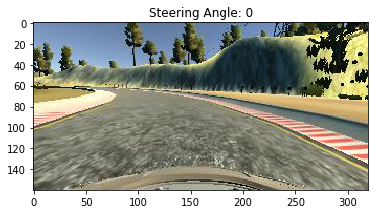

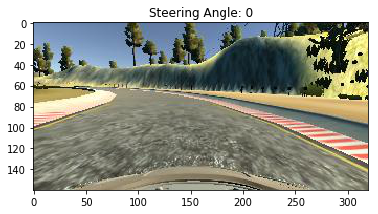

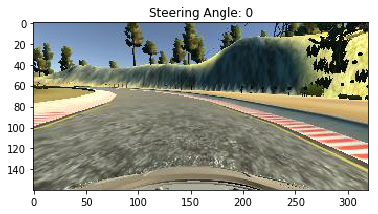

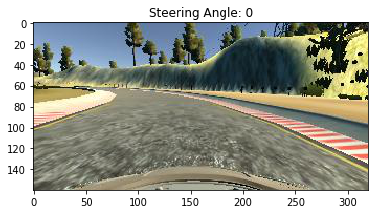

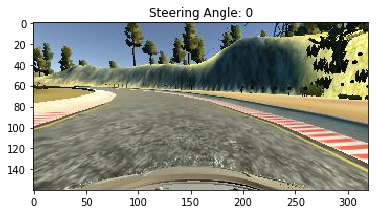

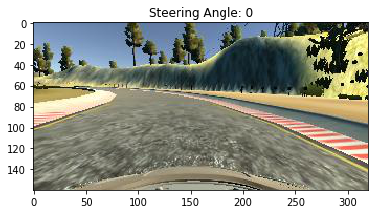

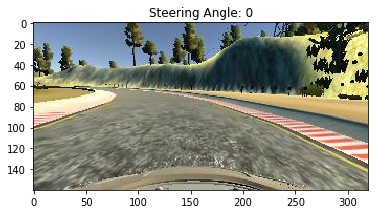

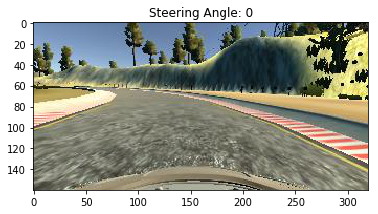

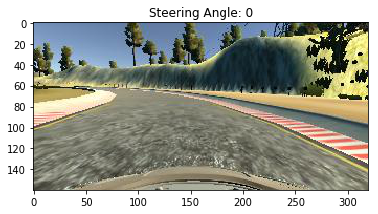

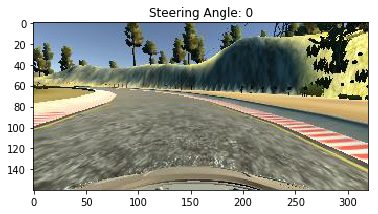

In [4]:
for image, label in zip(X_train[0:10], y_train[0:10]):
    fig = plt.figure()
    to_show = Image.fromarray(image)
    imshow(np.asarray(to_show))
    ax = fig.axes[0]
    ax.set_title('Steering Angle: ' + str(label))
    


In [5]:
# Convert to an ndarray
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
# shuffle the data
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Modeling the network architecture 
The network is modeled after [NVidia's network](http://images.nvidia.com/content/tegra/automotive/images/2016/solutions/pdf/end-to-end-dl-using-px.pdf)

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
# Taking a shot in the dark with this one: (Haven't read the doc)
from keras.layers.normalization import BatchNormalization
model = Sequential()
# TODO: Build a Multi-layer feedforward neural network with Keras here.

# Normalization layer will go here once I figure that out.
model.add(BatchNormalization(input_shape=(160,320,3)))
# Conv layers exactly from paper

model.add(Convolution2D(24,5,5))
model.add(Activation('relu'))
model.add(Convolution2D(36,5,5))
model.add(Activation('relu'))
model.add(Convolution2D(48,5,5))
model.add(Activation('relu'))
model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))
model.add(Convolution2D(64,3,3))
model.add(Activation('relu'))

# Flatten after all the conv layers
model.add(Flatten())

# Fully connected layers exactly as the paper had.
# They didn't show any activations...?
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('relu'))

#The final layer has an output of 1, because we want one steering angle
model.add(Dense(1))

# I don't think this is necessary but I'll leave it here incase.
# model.add(Activation('softmax'))

Using TensorFlow backend.


## Train the model
I'm starting with the same error measure as the paper.

In [ ]:
model.compile('adam', 'mean_squared_error', ['accuracy'])
%time
history = model.fit(X_train, y_train, batch_size=2, nb_epoch=1, validation_split=0, verbose=2)

Epoch 1/1
